# Step 2
Il nostro obiettivo è quello di ricercare il canale raro 
$$q\bar q \rightarrow g \rightarrow t\bar t \rightarrow Wb+Wb \rightarrow l\nu b + l\nu b$$
A tale scopo seguirò i seguenti passaggi:
* L'idea è di ritrovare un segnale all'energia di circa $344 GeV$
    + Ciò è dovuto al fatto che il quark top ha energia di circa $170GeV$
    + Per il nostro segnale, nei dati, sappiamo che il fondo principale è dato dalla risonanza della $Z^0$
        - A causa di ciò consideriamo, prima di poter effettuare i tagli e prima di studiare il dataset d'interesse, i file TTDilep e DYJets rispettivamente come campione di segnale e di fondo così da sapepre come effettuare una selezione
* Procediamo con la selezione e l'analisi del segnale
    + consideriamo solo i casi in cui ho almeno 2 muoni, altrimenti posso già scartare tutto
        - I muoni devono essere passing probes col cut deciso nello step 1 così da avere efficienza del 90%: 
        $$dz <0.014 \qquad dB<0.007 \qquad isoDeposits < 9$$ 
    + Dobbiamo considerare la selezione sui muoni ricavata dallo step 1, fatta col tag&probe
    + Dobbiamo riuscire a capire quanto le variabili che abbiamo siano discriminanti per il fondo. Per farlo utilizziamo:
        - Numero di jets
        - muon_dz
        - muon_dB
        - jets energy
        - muon pt
        - jets pt
        - met pt

---
Sto iniziando a analizzare i vari dataset così da riuscire a capire quali sono le caratteristiche sulle quali è possibile fare dei tagli,  

In [1]:
import ROOT
import particle as pt
import funx as fx
import numpy as np

filett = ROOT.TFile("./datas/TTDilep.root","OPEN")
tttr = filett.trees.events

fileDY = ROOT.TFile("./datas/DYJets.root","OPEN")
dytr = fileDY.trees.events

Welcome to JupyROOT 6.26/04


Warning in <TFile::Append>: Replacing existing TH1: Jet_size (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: Jet_e (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: Jet_pt (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: met (Potential memory leak).


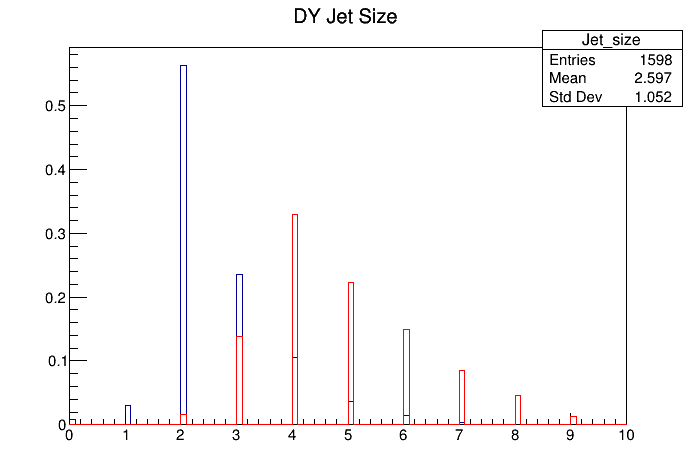

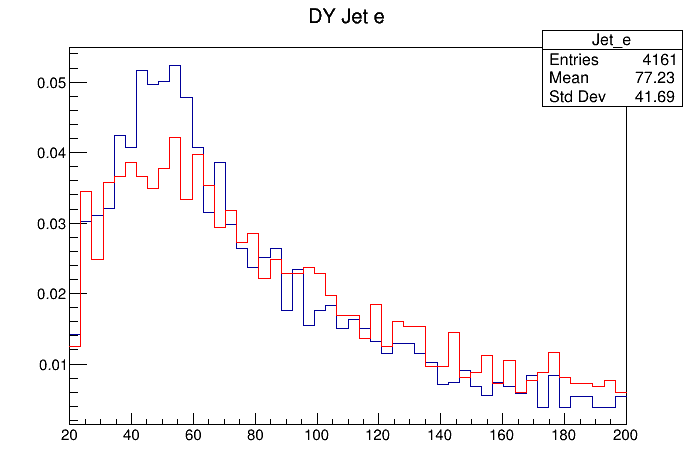

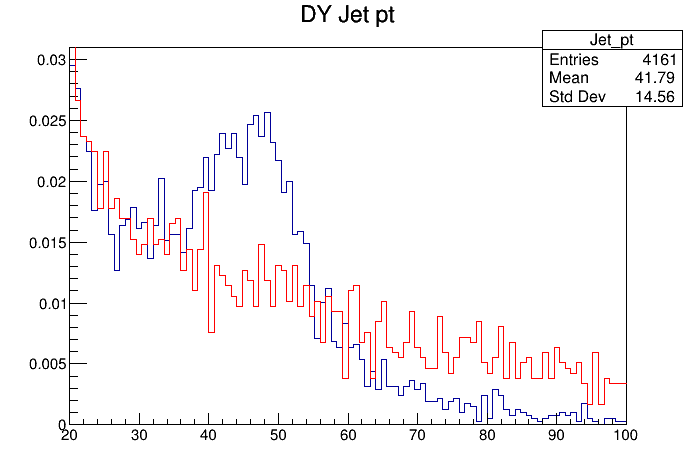

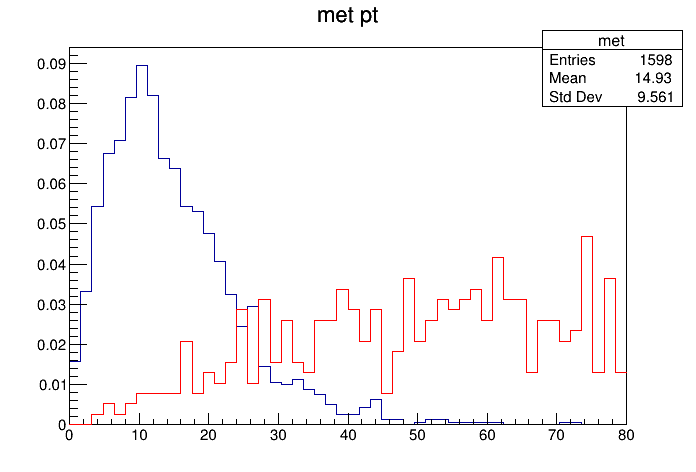

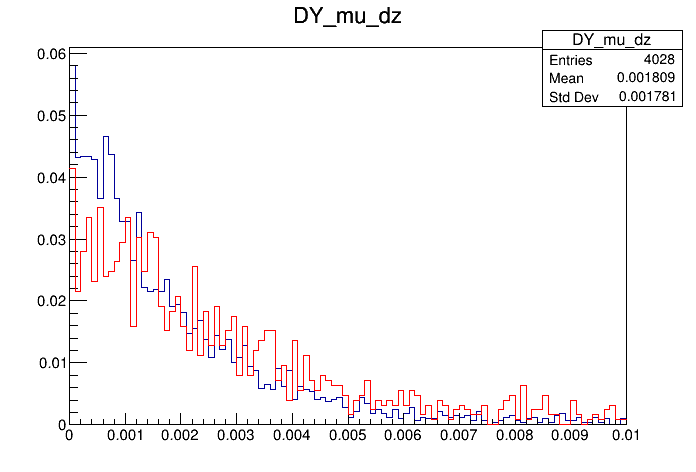

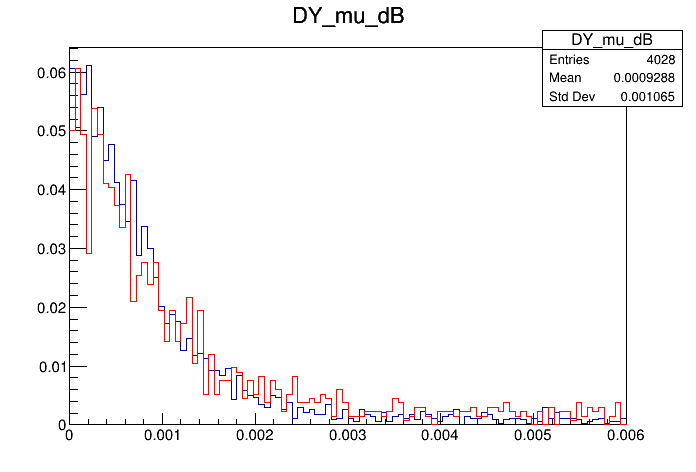

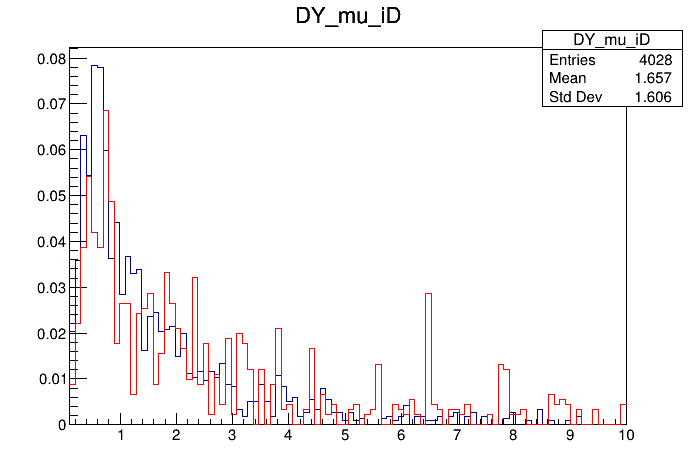

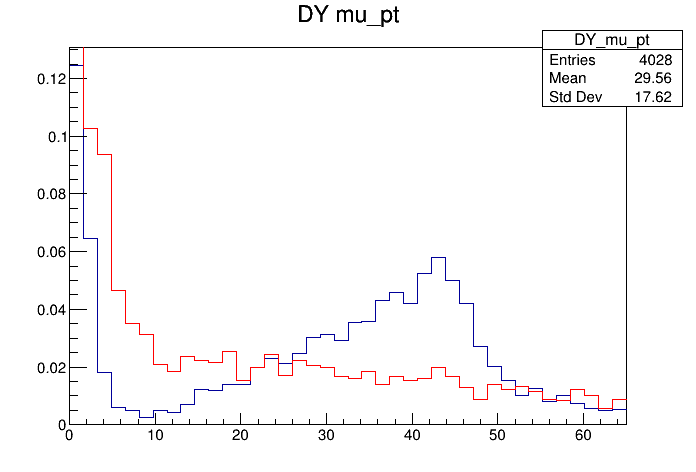

In [2]:
#jets
h_tt_jsz=ROOT.TH1F("Jet_size", "TT Jet Size", 100, 0 , 10)
h_dy_jsz=ROOT.TH1F("Jet_size", "DY Jet Size", 100, 0 , 10)
h_tt_je=ROOT.TH1F("Jet_e", "TT Jet e", 50, 20 , 200)
h_dy_je=ROOT.TH1F("Jet_e", "DY Jet e", 50, 20 , 200)
h_tt_jpt=ROOT.TH1F("Jet_pt", "TT Jet pt", 100, 20 , 100)
h_dy_jpt=ROOT.TH1F("Jet_pt", "DY Jet pt", 100, 20 , 100)
#met
h_tt_met=ROOT.TH1F("met", "met pt", 50, 0 , 80)
h_dy_met=ROOT.TH1F("met", "met pt", 50, 0 , 80)
#muoni
h_dz_dy=ROOT.TH1F("DY_mu_dz", "DY_mu_dz", 100, 0, 0.01)
h_dz_tt=ROOT.TH1F("TT_mu_dz", "TT_mu_dz", 100, 0, 0.01)
h_dB_dy=ROOT.TH1F("DY_mu_dB", "DY_mu_dB", 100, 0, 0.006)
h_dB_tt=ROOT.TH1F("TT_mu_dB", "TT_mu_dB", 100, 0, 0.006)
h_iD_dy=ROOT.TH1F("DY_mu_iD", "DY_mu_iD", 100, 0.1, 10)
h_iD_tt=ROOT.TH1F("TT_mu_iD", "TT_mu_iD", 100, 0.1, 10)
h_pt_dy=ROOT.TH1F("DY_mu_pt", "DY mu_pt", 40, 0, 65)
h_pt_tt=ROOT.TH1F("TT_mu_pt", "TT mu_pt", 40, 0, 65)

arr = [[h_tt_jsz, h_dy_jsz],[h_tt_je,h_dy_je], [h_tt_jpt,h_dy_jpt], [h_tt_met,h_dy_met], [h_dz_tt,h_dz_dy],[h_dB_tt,h_dB_dy], [h_iD_tt,h_iD_dy],[h_pt_tt,h_pt_dy]]

fx.histos_cut(tttr,h_tt_jsz,h_tt_met,h_tt_je,h_tt_jpt,h_dz_tt,h_dB_tt,h_pt_tt,h_iD_tt)
fx.histos_cut(dytr,h_dy_jsz,h_dy_met,h_dy_je,h_dy_jpt,h_dz_dy,h_dB_dy,h_pt_dy,h_iD_dy)


c=list(np.zeros(8))
h_tts=[]
h_dys=[]
for i in arr:
    h_tts.append(i[0])
    h_dys.append(i[1])
for i in range(8):
    c[i]=ROOT.TCanvas()
    c[i].Draw()
    h_tts[i].Scale(1/h_tts[i].Integral())
    h_dys[i].Scale(1/h_dys[i].Integral())
    h_dys[i].Draw("hist")
    h_tts[i].SetLineColor(ROOT.kRed)
    h_tts[i].Draw("SAME,hist")    

In seguito agli istogrammi che ci sono usciti abbiamo deciso di effettuare i seguenti tagli:
* $Size_{jet}\geq 3$
* $52<P_{T,Jet}<35 \qquad GeV$
* $P_{T, Met} > 25 \qquad GeV$
* $dz_{\mu} >0.001 \qquad \text{forse}$
* $P_{T,\mu}<30 \qquad GeV$